In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
stock_symbol = "^NSEI"
start_date = "2010-01-01"
end_date = "2023-09-28"

stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

df = pd.DataFrame(stock_data)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0


#Labelling

  #### 1 -> rise_plus
  #### 2 -> rise
  #### 3 -> fall
  #### 4 -> fall plus

In [4]:
look_ahead = 5
df['Daily Returns'] = df['Adj Close'].pct_change()
volatility_window = look_ahead  # Adjust the window size as needed
df['Volatility'] = df['Daily Returns'].rolling(window=volatility_window).std()
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Volatility
Date,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,NaN,NaN
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,0.008734,NaN
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,0.000739,NaN
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,-0.003540,NaN
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,-0.003487,NaN
2010-01-11,5263.799805,5287.200195,5227.799805,5249.399902,5249.399902,0,0.000887,0.005002
2010-01-12,5251.100098,5300.500000,5200.950195,5210.399902,5210.399902,0,-0.007429,0.003475
2010-01-13,5212.600098,5239.200195,5169.549805,5233.950195,5233.950195,0,0.004520,0.004602
2010-01-14,5234.500000,5272.850098,5232.500000,5259.899902,5259.899902,0,0.004958,0.005317


In [5]:
df['labels'] = 0
for i in range(len(df)-look_ahead):
  upper_thr = df['Adj Close'][i] + 11*(df['Volatility'][i+look_ahead])
  lower_thr = df['Adj Close'][i] - 11*(df['Volatility'][i+look_ahead])
  count = 0
  for j in range(i, i+look_ahead):
    if df['Adj Close'][j] > upper_thr:
      count+=1
    elif df['Adj Close'][j] < lower_thr:
      count-=1

  if count>0:
    df['labels'][i] = 1
  elif count<0:
    df['labels'][i] = -1
  else:
    df['labels'][i] = 0


<ipython-input-5-f0e9b548ef27>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'][i] = 1
<ipython-input-5-f0e9b548ef27>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'][i] = -1
<ipython-input-5-f0e9b548ef27>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'][i] = 0


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Volatility,labels
Date,,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,NaN,NaN,1
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,0.008734,NaN,-1
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,0.000739,NaN,-1
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,-0.003540,NaN,-1
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,-0.003487,NaN,0


<Axes: xlabel='Date', ylabel='Adj Close'>

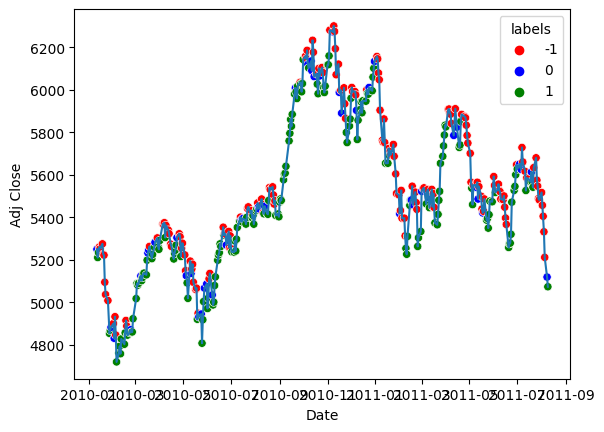

In [7]:
sns.lineplot(x = df.index[5:400], y = df['Adj Close'][5:400])
custom_palette = {1: 'green', 0: 'blue', -1: 'red'}

sns.scatterplot(x = df.index[5:400], y = df['Adj Close'][5:400], hue = df['labels'][5:400],palette=custom_palette, markers = True)

In [8]:
df.isna().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Daily Returns    1
Volatility       5
labels           0
dtype: int64

In [9]:
df.dropna(inplace = True)

##Feature Creation


1.   SMA - 10
2.   EMA - 10
3.   MOMENTUM
4.  STOCHIASTIC K%
5. STOCHISTIC D%
6. RSI
7. MACD
8. LARRY WILLIAM R%
9. A/D OSCILLATOR
10. CCI
11. Alexander's Filter
12. CHO (Chaikin Oscillator)
13. MFI (Money Flow Index)
14. VWAP



In [10]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=68b8c8d20a18f792c15d0817aa56929af6453779aa432d728f88b9940782aea5
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [11]:
import ta

In [12]:
def integrate_features(df):
  #sma-10
  sma_window = 5
  df['SMA'] = df['Adj Close'].rolling(window = sma_window).mean()

  #ema-10
  ema_window = 5
  df['EMA'] = df['Adj Close'].ewm(span = ema_window, adjust = False).mean()

  #momentum-5
  momentum_window = 5
  df['Momentum'] = df['Adj Close'].diff(momentum_window)

  # %k and %d - 14
  stoch_window = 5
  df['Lowest Low'] = df['Low'].rolling(window=stoch_window).min()
  df['Highest High'] = df['High'].rolling(window=stoch_window).max()
  df['%K'] = ((df['Close'] - df['Lowest Low']) / (df['Highest High'] - df['Lowest Low'])) * 100
  df['%D'] = df['%K'].rolling(window=3).mean()
  df.drop(['Lowest Low', 'Highest High'], axis=1, inplace=True)

  #rsi
  rsi_window = 5
  df['RSI'] = ta.momentum.RSIIndicator(df['Adj Close'], window = rsi_window).rsi()

  #macd
  short_ema = df['Adj Close'].ewm(span=12, adjust=False).mean()
  long_ema = df['Adj Close'].ewm(span=26, adjust=False).mean()
  df['MACD'] = short_ema - long_ema
  signal_ema = df['MACD'].ewm(span=9, adjust=False).mean()
  df['Signal_Line'] = signal_ema

  #william r
  wr_window = 5
  df['Highest_High'] = df['High'].rolling(window=wr_window).max()
  df['Lowest_Low'] = df['Low'].rolling(window=wr_window).min()
  df['%R'] = ((df['Highest_High'] - df['Adj Close']) / (df['Highest_High'] - df['Lowest_Low'])) * -100
  df = df.drop(['Highest_High', 'Lowest_Low'], axis=1)

  #a/d osc
  df['AD_Oscillator'] = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low']) * df['Volume']

  #cci
  df['Typical_Price'] = (df['High'] + df['Low'] + df['Close']) / 3
  sma_window_ = 5
  df['SMA_Typical_Price'] = df['Typical_Price'].rolling(window=sma_window_).mean()
  df['Mean_Deviation'] = abs(df['Typical_Price'] - df['SMA_Typical_Price'])
  cci_window = 14
  df['CCI'] = (df['Typical_Price'] - df['SMA_Typical_Price']) / (0.015 * df['Mean_Deviation'].rolling(window=cci_window).mean())


  #alexander's filter
  window_af = 5
  df['Trend'] = df['Close'].ewm(span=window_af, adjust=False).mean()
  df['Alexander_Filter'] = df['Close'] - df['Trend']
  df.drop(['Trend'], axis = 1)

  #cho
  period = 3
  df['High'] = df['Close'].rolling(window=period).max()
  df['Low'] = df['Close'].rolling(window=period).min()
  df['CHO'] = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low']) * 100

  #mfi
  df['Typical Price'] = (df['High'] + df['Low'] + df['Close']) / 3
  df['Money Flow'] = df['Typical Price'] * df['Volume']
  df['Money Flow Ratio'] = df['Money Flow'].diff() / df['Money Flow'].shift(1)
  df['MFI'] = 100 - (100 / (1 + df['Money Flow Ratio']))
  df = df.drop(['Typical Price', 'Money Flow', 'Money Flow Ratio'], axis=1)

  #vwap
  df['Cumulative_Volume'] = df['Volume'].cumsum()
  df['Cumulative_Value'] = (df['Close'] * df['Volume']).cumsum()
  df['VWAP'] = df['Cumulative_Value'] / df['Cumulative_Volume']
  df.drop(['Cumulative_Volume', 'Cumulative_Value'], axis=1, inplace=True)

  #adx
  df['TR'] = np.maximum.reduce([
    df['High'] - df['Low'],
    abs(df['High'] - df['Close'].shift()),
    abs(df['Low'] - df['Close'].shift())
    ])
  df['DMplus'] = np.where((df['High'] - df['High'].shift()) > (df['Low'].shift() - df['Low']), np.maximum(df['High'] - df['High'].shift(), 0), 0)
  df['DMminus'] = np.where((df['Low'].shift() - df['Low']) > (df['High'] - df['High'].shift()), np.maximum(df['Low'].shift() - df['Low'], 0), 0)
  atr_window = 5
  df['ATR'] = df['TR'].rolling(window=atr_window).mean()
  df['DMplus_smoothed'] = df['DMplus'].rolling(window=atr_window).mean()
  df['DMminus_smoothed'] = df['DMminus'].rolling(window=atr_window).mean()
  df['DIplus'] = (df['DMplus_smoothed'] / df['ATR']) * 100
  df['DIminus'] = (df['DMminus_smoothed'] / df['ATR']) * 100
  df['DX'] = np.abs(df['DIplus'] - df['DIminus']) / (df['DIplus'] + df['DIminus']) * 100
  adx_window = 5
  df['ADX'] = df['DX'].rolling(window=adx_window).mean()
  df = df.drop(['TR', 'DMplus', 'DMminus', 'DMplus_smoothed', 'DMminus_smoothed', 'DIplus', 'DIminus', 'DX'], axis=1)


  return df

In [13]:
df = integrate_features(df)

In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Volatility,labels,SMA,...,SMA_Typical_Price,Mean_Deviation,CCI,Trend,Alexander_Filter,CHO,MFI,VWAP,ATR,ADX
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-11,5263.799805,NaN,NaN,5249.399902,5249.399902,0,0.000887,0.005002,0,NaN,...,NaN,NaN,NaN,5249.399902,0.000000,NaN,NaN,NaN,NaN,NaN
2010-01-12,5251.100098,NaN,NaN,5210.399902,5210.399902,0,-0.007429,0.003475,1,NaN,...,NaN,NaN,NaN,5236.399902,-26.000000,NaN,NaN,NaN,NaN,NaN
2010-01-13,5212.600098,5249.399902,5210.399902,5233.950195,5233.950195,0,0.004520,0.004602,1,NaN,...,NaN,NaN,NaN,5235.583333,-1.633138,20.770733,NaN,NaN,NaN,NaN
2010-01-14,5234.500000,5259.899902,5210.399902,5259.899902,5259.899902,0,0.004958,0.005317,-1,NaN,...,NaN,NaN,NaN,5243.688856,16.211046,100.000000,NaN,NaN,NaN,NaN
2010-01-15,5259.899902,5259.899902,5233.950195,5252.200195,5252.200195,0,-0.001464,0.005067,-1,5241.17002,...,5243.913379,14.253451,NaN,5246.525969,5.674226,40.656694,NaN,NaN,NaN,NaN


In [15]:
df.isna().sum()

Open                   0
High                   2
Low                    2
Close                  0
Adj Close              0
Volume                 0
Daily Returns          0
Volatility             0
labels                 0
SMA                    4
EMA                    0
Momentum               5
%K                     4
%D                     6
RSI                    4
MACD                   0
Signal_Line            0
%R                     4
AD_Oscillator          0
Typical_Price          0
SMA_Typical_Price      4
Mean_Deviation         4
CCI                   17
Trend                  0
Alexander_Filter       0
CHO                    2
MFI                  743
VWAP                 742
ATR                    6
ADX                   35
dtype: int64

In [16]:
df.drop(columns = ['MFI', 'VWAP'],inplace = True)

In [17]:
df.isna().sum()

Open                  0
High                  2
Low                   2
Close                 0
Adj Close             0
Volume                0
Daily Returns         0
Volatility            0
labels                0
SMA                   4
EMA                   0
Momentum              5
%K                    4
%D                    6
RSI                   4
MACD                  0
Signal_Line           0
%R                    4
AD_Oscillator         0
Typical_Price         0
SMA_Typical_Price     4
Mean_Deviation        4
CCI                  17
Trend                 0
Alexander_Filter      0
CHO                   2
ATR                   6
ADX                  35
dtype: int64

In [18]:
columns = df.columns
len(columns)

28

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Initialize the Iterative Imputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the dataset
df = imputer.fit_transform(df)
#print("\nImputed Data:\n", df)
df = pd.DataFrame(df)
df.columns  = columns


In [20]:
df.drop([0, 1], inplace= True)

In [21]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Volatility,labels,SMA,...,AD_Oscillator,Typical_Price,SMA_Typical_Price,Mean_Deviation,CCI,Trend,Alexander_Filter,CHO,ATR,ADX
3357,19989.500000,20070.000000,19993.199219,20070.000000,20070.000000,251400.0,0.003841,0.003295,1.0,19921.309766,...,162882.675052,20037.000000,19895.153385,141.846615,84.341284,19921.619300,148.380700,100.000000,176.709766,100.000000
3358,20127.949219,20103.099609,19993.199219,20103.099609,20103.099609,275100.0,0.001649,0.003432,0.0,19996.519531,...,-10854.144454,20104.733073,19981.826562,122.906510,72.391199,19982.112737,120.986873,100.000000,168.259766,100.000000
3359,20156.449219,20192.349609,20070.000000,20192.349609,20192.349609,438200.0,0.004440,0.003416,-1.0,20070.999609,...,153787.087264,20181.499349,20057.183073,124.316276,70.618815,20052.191694,140.157915,100.000000,150.950000,100.000000
3360,20155.949219,20192.349609,20103.099609,20133.300781,20133.300781,264900.0,-0.002924,0.003016,-1.0,20098.389844,...,-147822.007798,20148.116536,20095.483073,52.633464,29.272131,20079.228057,54.072725,-32.322304,114.940234,100.000000
3361,19980.750000,20192.349609,19901.400391,19901.400391,19901.400391,378100.0,-0.011518,0.006602,-1.0,20080.030078,...,-278840.260567,19943.633464,20082.996484,139.363021,-72.663481,20019.952168,-118.551777,-100.000000,137.850000,80.286610
3362,19840.550781,20133.300781,19742.349609,19742.349609,19742.349609,275100.0,-0.007992,0.006597,0.0,20014.500000,...,-146666.321448,19767.016276,20028.999740,261.983464,-120.964683,19927.417982,-185.068372,-100.000000,200.680078,70.156226
3363,19744.849609,19901.400391,19674.250000,19674.250000,19674.250000,246400.0,-0.003449,0.006015,0.0,19928.730078,...,-187920.530241,19710.133464,19950.079818,239.946354,-100.954506,19843.028654,-168.778654,-100.000000,224.130078,63.265659
3364,19678.199219,19742.349609,19674.250000,19674.550781,19674.550781,188400.0,0.000015,0.004559,0.0,19825.170312,...,19039.525121,19670.083984,19847.796745,177.712760,-72.975763,19786.869363,-112.318582,-99.116643,213.280078,63.265659
3365,19682.800781,19674.550781,19664.699219,19664.699219,19664.699219,204900.0,-0.000501,0.004969,0.0,19731.450000,...,-24496.453476,19667.166016,19751.606641,84.440625,-35.536820,19746.145982,-81.446763,-100.000000,197.400391,63.265659
3366,19637.050781,19716.449219,19664.699219,19716.449219,19716.449219,203600.0,0.002632,0.004052,0.0,19694.459766,...,170761.145131,19667.049479,19696.289844,29.240365,-12.809338,19736.247061,-19.797842,100.000000,149.560547,76.963472


<Axes: ylabel='Adj Close'>

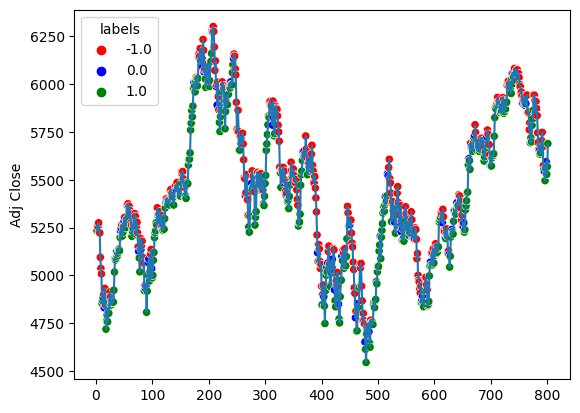

In [22]:
sns.lineplot(x = df.index[0:800], y = df['Adj Close'][0:800])
custom_palette = {1: 'green', 0: 'blue', -1: 'red'}

sns.scatterplot(x = df.index[0:800], y = df['Adj Close'][0:800], hue = df['labels'][0:800],palette=custom_palette, markers = True)

In [23]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Volatility,labels,SMA,...,AD_Oscillator,Typical_Price,SMA_Typical_Price,Mean_Deviation,CCI,Trend,Alexander_Filter,CHO,ATR,ADX
3362,19840.550781,20133.300781,19742.349609,19742.349609,19742.349609,275100.0,-0.007992,0.006597,0.0,20014.500000,...,-146666.321448,19767.016276,20028.999740,261.983464,-120.964683,19927.417982,-185.068372,-100.000000,200.680078,70.156226
3363,19744.849609,19901.400391,19674.250000,19674.250000,19674.250000,246400.0,-0.003449,0.006015,0.0,19928.730078,...,-187920.530241,19710.133464,19950.079818,239.946354,-100.954506,19843.028654,-168.778654,-100.000000,224.130078,63.265659
3364,19678.199219,19742.349609,19674.250000,19674.550781,19674.550781,188400.0,0.000015,0.004559,0.0,19825.170312,...,19039.525121,19670.083984,19847.796745,177.712760,-72.975763,19786.869363,-112.318582,-99.116643,213.280078,63.265659
3365,19682.800781,19674.550781,19664.699219,19664.699219,19664.699219,204900.0,-0.000501,0.004969,0.0,19731.450000,...,-24496.453476,19667.166016,19751.606641,84.440625,-35.536820,19746.145982,-81.446763,-100.000000,197.400391,63.265659
3366,19637.050781,19716.449219,19664.699219,19716.449219,19716.449219,203600.0,0.002632,0.004052,0.0,19694.459766,...,170761.145131,19667.049479,19696.289844,29.240365,-12.809338,19736.247061,-19.797842,100.000000,149.560547,76.963472


In [24]:
df.isna().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Daily Returns        0
Volatility           0
labels               0
SMA                  0
EMA                  0
Momentum             0
%K                   0
%D                   0
RSI                  0
MACD                 0
Signal_Line          0
%R                   0
AD_Oscillator        0
Typical_Price        0
SMA_Typical_Price    0
Mean_Deviation       0
CCI                  0
Trend                0
Alexander_Filter     0
CHO                  0
ATR                  0
ADX                  0
dtype: int64

## Feature Selection

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
df_copy = df.drop(columns = ['labels'])

In [26]:
scaler = MinMaxScaler()
df_copy = scaler.fit_transform(df_copy)
df_copy = pd.DataFrame(df_copy)
df_copy.columns = columns.drop('labels')
df_copy

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Volatility,SMA,EMA,...,AD_Oscillator,Typical_Price,SMA_Typical_Price,Mean_Deviation,CCI,Trend,Alexander_Filter,CHO,ATR,ADX
0,0.037948,0.038467,0.042818,0.044079,0.044079,0.000000,0.617764,0.045414,0.144449,0.037908,...,0.548442,0.041213,0.129616,0.000000,0.956728,0.037908,0.666585,0.603854,0.000000,0.998262
1,0.039357,0.039142,0.042818,0.045737,0.045737,0.000000,0.619778,0.054374,0.144572,0.038434,...,0.548442,0.043830,0.129967,0.005445,1.000000,0.038434,0.681046,1.000000,0.001307,1.000000
2,0.040993,0.039142,0.044332,0.045245,0.045245,0.000000,0.590244,0.051241,0.038443,0.038618,...,0.548442,0.044028,0.038605,0.242232,0.512543,0.038618,0.672507,0.703283,0.098126,0.626909
3,0.040590,0.040104,0.045505,0.046692,0.046692,0.000000,0.616810,0.055271,0.038772,0.039229,...,0.548442,0.044493,0.038742,0.246789,0.560901,0.039229,0.683211,1.000000,0.100134,0.654320
4,0.041913,0.040104,0.043798,0.043548,0.043548,0.000000,0.554080,0.064726,0.038970,0.038574,...,0.548442,0.043122,0.038830,0.232572,0.441963,0.038574,0.651529,0.000000,0.085360,0.583258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360,0.979663,0.996200,0.976814,0.971243,0.971243,0.151905,0.560221,0.070417,0.994571,0.990160,...,0.484432,0.973449,0.995696,0.461865,0.307688,0.990160,0.517930,0.000000,0.267017,0.606749
3361,0.973502,0.981278,0.972437,0.966891,0.966891,0.136057,0.581113,0.063123,0.989020,0.984691,...,0.466427,0.969805,0.990588,0.442328,0.335671,0.984691,0.531131,0.000000,0.293084,0.540322
3362,0.969211,0.971044,0.972437,0.966910,0.966910,0.104031,0.597047,0.044878,0.982317,0.981051,...,0.556752,0.967239,0.983966,0.387152,0.374796,0.981051,0.576886,0.004417,0.281023,0.540322
3363,0.969508,0.966681,0.971823,0.966280,0.966280,0.113142,0.594674,0.050009,0.976252,0.978411,...,0.537751,0.967052,0.977740,0.304459,0.427152,0.978411,0.601905,0.000000,0.263371,0.540322


###PCA

In [27]:
pca = PCA(n_components = 16)
df_copy_pca = pca.fit_transform(df_copy)

In [28]:
df_copy_pca.shape

(3365, 16)

In [29]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([6.92609198e-01, 2.08620042e-01, 3.76329866e-02, 2.22907608e-02,
       1.08760704e-02, 9.75422388e-03, 5.39795750e-03, 4.51087045e-03,
       2.65277595e-03, 2.01007239e-03, 1.44673908e-03, 8.41383715e-04,
       6.55739309e-04, 2.79684870e-04, 1.97777703e-04, 1.14367750e-04])

In [30]:
feature_imp = pca.components_
feature_imp.shape

(16, 27)

In [31]:
df_copy_pca = pd.DataFrame(df_copy_pca)
df_copy_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.889326,0.453270,-0.431203,-0.484918,0.978022,0.919608,0.118460,0.135423,-0.078990,1.239600,-0.248023,0.338247,-0.021977,-0.038868,0.049364,-0.080804
1,-0.870826,0.844767,-0.427240,-0.457974,0.932694,0.887771,0.157262,0.130136,-0.076677,1.237961,-0.246877,0.318786,-0.015537,-0.035549,0.053612,-0.080961
2,-0.951494,0.195985,0.005056,-0.052859,-0.069226,0.035896,0.022653,0.016532,-0.013806,0.007958,0.009867,-0.014395,-0.027419,-0.000329,-0.004830,-0.000735
3,-0.937154,0.498938,-0.019185,-0.038692,-0.080509,0.030219,0.049951,0.011458,-0.014103,0.020750,0.013891,0.000279,-0.025459,0.009619,-0.001034,0.002214
4,-0.980750,-0.501951,0.040038,-0.099052,0.015716,0.091295,-0.039413,0.021190,-0.010061,0.009532,0.008564,-0.017685,-0.011273,-0.020497,-0.006959,0.008855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360,2.012491,-0.680314,0.029423,-0.029297,-0.138830,-0.039304,0.035501,-0.112656,-0.079773,0.014063,0.004249,0.034290,0.041123,0.028583,0.018631,-0.003831
3361,1.992975,-0.677432,0.098421,-0.023136,-0.142655,-0.022479,0.046164,-0.115366,-0.057340,-0.024414,0.027166,0.051888,0.009289,0.026658,0.006614,-0.016701
3362,1.977845,-0.650471,0.098015,-0.056661,-0.138136,0.034816,-0.044263,-0.091471,-0.033265,-0.030813,0.067170,0.042508,-0.010409,0.020759,-0.019583,-0.006548
3363,1.967488,-0.642633,0.097821,-0.080979,-0.110218,0.078020,-0.024774,-0.040477,0.030354,-0.044306,0.088812,0.027535,-0.016633,0.010992,-0.020428,-0.005207


In [32]:
columns_new = ['Feature'+ str(i+1) for i in range(16)]

In [33]:
features = df_copy_pca
features.columns = columns_new
labels = df['labels']
len(features)

3365

In [34]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
labels = enc.fit_transform(labels)
labels = pd.DataFrame(labels)

In [35]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(labels)


##### 2 -> up
##### 1 -> sideways
##### 0 -> down

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

##Model

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Add, Activation

In [38]:
def skip_connected_ann(input_shape, num_classes):
  input_tensor = Input(shape = input_shape)

  #First block
  x = Dense(21, activation = tf.keras.layers.LeakyReLU(alpha=0.01))(input_tensor)
  x = Dense(21, activation = 'relu')(x)
  x = Dense(21, activation = 'relu')(x)
  x = Dense(21, activation = 'relu')(x)

  shortcut = x

  x = Dense(21, activation = 'relu')(x)
  x = Dense(21, activation = 'relu')(x)

  x = Add()([x, shortcut])
  x = Activation('relu')(x)


  x = Dense(11, activation = 'relu')(x)
  x = Dense(11, activation = 'relu')(x)

  shortcut = x

  x = Dense(11, activation = 'relu')(x)
  x = Dense(11, activation = 'relu')(x)

  x = Add()([x, shortcut])
  x = Activation('relu')(x)

  #output
  output_tensor = Dense(num_classes, activation = 'softmax')(x)

  model = Model(inputs = input_tensor, outputs = output_tensor)

  return model

In [39]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.5 MB/s eta 0:00:00


In [40]:
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

<ipython-input-40-73c42c24ddd4>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [41]:
def build_model(hp):
  input_tensor = Input(shape = input_shape)
  hp_units = hp.Int('units', min_value = 11, max_value = 111, step = 10)
  hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])
  x = Dense(hp_units, activation = hp_activation)(input_tensor)
  x = Dense(hp_units, activation = hp_activation)(x)

  shortcut = x

  x = Dense(hp_units, activation = hp_activation)(x)
  x = Dense(hp_units, activation = hp_activation)(x)

  x = Add()([x, shortcut])
  x = Activation('relu')(x)

  output_tensor = Dense(3, activation = 'softmax')(x)

  model = Model(inputs = input_tensor, outputs = output_tensor)

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])

  model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate) if hp_optimizer == 'adam' else hp_optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
  )
  return model

In [43]:
input_shape = (None, None, 16)

In [44]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to train for each trial
    directory='my_tuner_dir',  # Directory to store tuner logs and checkpoints
    project_name='my_tuner_project'  # Name of the tuning project
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Get the best hyperparameters
best_hps = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters
print(f"Best Hyperparameters: {best_hps}")

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 00m 08s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.5059523582458496
Total elapsed time: 00h 01m 05s
Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7bd0475e6950>


In [45]:
loss_test, accuracy_test = best_model.evaluate(X_test, y_test)
print(accuracy_test)

6/6 [==============================] - 0s 4ms/step - loss: 1.0053 - accuracy: 0.5207
0.5207100510597229
